<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/inpainting_from_PCA_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Create and Display the Mask


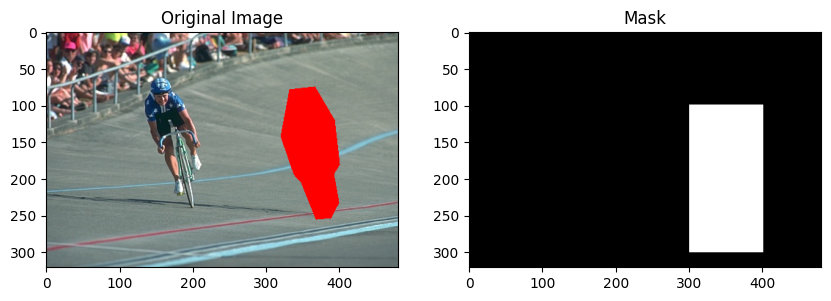

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '22.png'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Create a mask
def create_mask(image):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.rectangle(mask, (400,100), (300, 300), 50, -1)  # Example rectangular mask
    return mask

mask = create_mask(original_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.show()


# Step 2: Inpaint Using the Criminisi Method


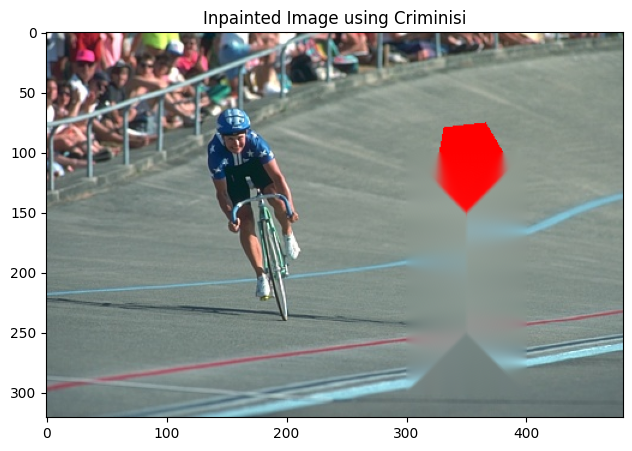

In [22]:
# Placeholder for Criminisi inpainting method
def criminisi_inpaint(image, mask):
    return cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

goal_patch_image = criminisi_inpaint(original_image, mask)

plt.figure(figsize=(10, 5))
plt.title("Inpainted Image using Criminisi")
plt.imshow(goal_patch_image)
plt.show()


# Step 3: Find and Display Similar Patches


<ipython-input-23-962b82438dbb>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)


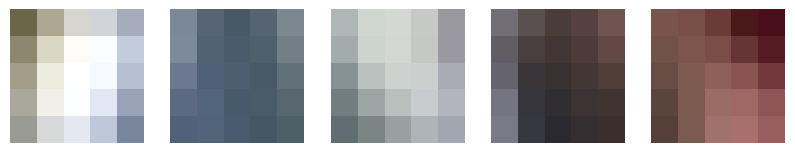

In [23]:
def find_similar_patches(image, mask, patch_size=5):
    h, w = image.shape[:2]
    similar_patches = []
    for y in range(0, h-patch_size, patch_size):
        for x in range(0, w-patch_size, patch_size):
            if np.sum(mask[y:y+patch_size, x:x+patch_size]) == 0:
                patch = image[y:y+patch_size, x:x+patch_size]
                similar_patches.append((x, y, patch))
    return similar_patches

similar_patches = find_similar_patches(original_image, mask)

# Display some similar patches
plt.figure(figsize=(10, 5))
plt.title("Similar Patches")
for i, (x, y, patch) in enumerate(similar_patches[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.show()


# Step 4: Replace the Best Similar Patch to the Goal Patch


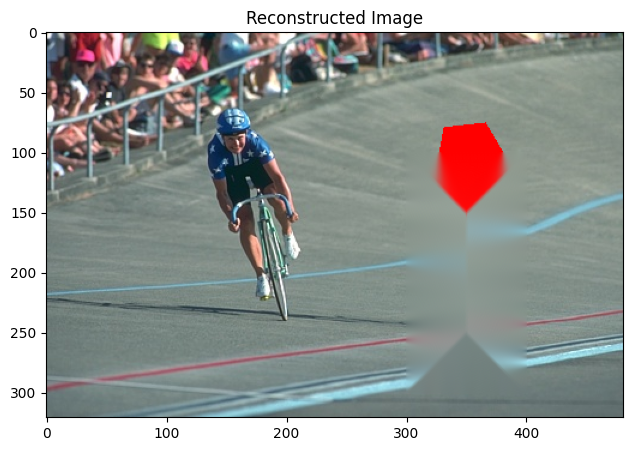

In [24]:
def replace_best_patch(image, mask, similar_patches, patch_size=5):
    goal_patch = image[50:50+patch_size, 50:50+patch_size]  # Example goal patch position
    best_patch = similar_patches[0][2]  # Placeholder for the best patch
    image[50:50+patch_size, 50:50+patch_size] = best_patch
    return image

reconstructed_image = replace_best_patch(goal_patch_image, mask, similar_patches)

plt.figure(figsize=(10, 5))
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.show()


Step 5: Inpaint All Damaged Parts Using the Mask
